<a href="https://colab.research.google.com/github/FarabiHossain/SUICIDE-ATTEMPT-PREDICTION-RATE-ANALYSIS-BASED-ON-THE-MACHINE-LEARNING-APPROACH-/blob/main/bangla_suicideAttemptPredictionpaperCode_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import dill
dill.dump_session('notebook_env.db')
#dill.load_session('notebook_env.db')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M:%S')
dataset = pd.read_excel('/content/s_a_p_data_set -fnl.xlsx')

In [ ]:
dataset.attempt_suicide.value_counts()

No     167
Yes     32
Name: attempt_suicide, dtype: int64

In [ ]:
#dataset.describe(include='all')

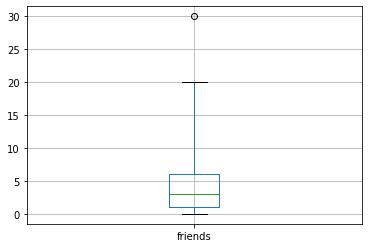

In [ ]:
fig, ax = plt.subplots()
# ax.set_ylim(0, 105)
# whiskers on 0.3 and 99.7 percentile to determine outliers
dataset.boxplot(column='friends', ax=ax, whis=[0.3,99.7])

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

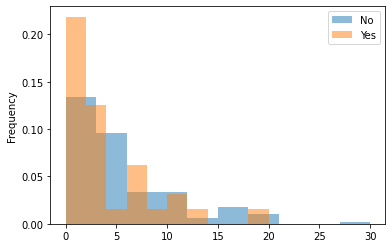

In [ ]:
dataset.loc[dataset['friends'] <= 50,:] \
        .groupby('attempt_suicide')['friends'] \
        .plot.hist(legend=True, density=True, alpha = 0.5)

social_fear
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

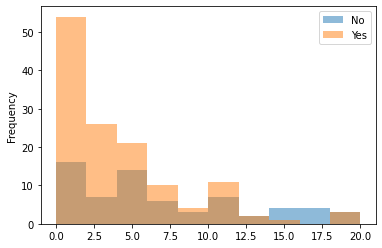

In [ ]:
dataset = dataset[dataset['friends'] < dataset['friends'].quantile(0.997)]
dataset.groupby('social_fear')['friends'].plot.hist(legend=True, alpha = 0.5)

In [ ]:
dataset.groupby('social_fear')['friends'].max()

social_fear
No     20
Yes    20
Name: friends, dtype: int64

In [ ]:
dataset['improve_yourself_how'].head(15)

0     Joined a gym, Therapy, Other exercise, join cl...
1                                                  None
2                                                  None
3           Cosmetic survey, Joined a gym/go to the gym
4                                 socual clubs/meet ups
5                                     Therapy, meet ups
6                                        Other exercise
7                                                  None
8                                                  None
9                                                  None
10                                              Therapy
11                                                 None
12                                                 None
13                                         Joined a gym
14                             Other exercise, meet ups
Name: improve_yourself_how, dtype: object

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_improves, dtype: object

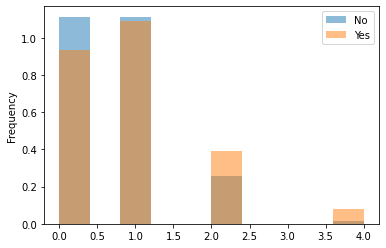

In [ ]:
dataset['improve_yourself_how'] = dataset['improve_yourself_how'].str.lower()
# none isn't an improvment, so we don't need to count it
dataset['total_improves'] = dataset['improve_yourself_how'].str.split(',').apply(lambda x: len([i for i in x if i != 'none']))
dataset.groupby('attempt_suicide')['total_improves'].plot.hist(legend=True, density=True, alpha = 0.5)

In [ ]:
improvements = dataset['improve_yourself_how'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
improvements = improvements.str.strip()
top_improvements = improvements.value_counts()
top_improvements

none                                87
other exercise                      30
joined a gym                        20
therapy                             19
meet ups                            18
join clubs/socual clubs/meet ups    12
socual clubs/meet ups               11
joined a gym/go to the gym           6
                                     5
join clubs                           4
socual clubs                         4
join clubs/socual clubs              3
join clubs/meet ups                  3
cosmetic survey                      2
go to the gym                        2
dtype: int64

In [ ]:
top_improvements = top_improvements[top_improvements > 5]

In [ ]:
for imp in top_improvements.index:
    dataset['[improve] {}'.format(imp)] = dataset['improve_yourself_how'].str.contains(imp, regex=False)

In [ ]:
col = {x:'sum' for x in dataset.columns if '[improve]' in x}
dataset.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[improve] none,[improve] other exercise,[improve] joined a gym,[improve] therapy,[improve] meet ups,[improve] join clubs/socual clubs/meet ups,[improve] socual clubs/meet ups,[improve] joined a gym/go to the gym
attempt_suicide,,,,,,,,
No,0.373737,0.121212,0.116162,0.080808,0.151515,0.040404,0.090909,0.025253
Yes,0.265306,0.122449,0.061224,0.061224,0.285714,0.081633,0.102041,0.020408


attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_help, dtype: object

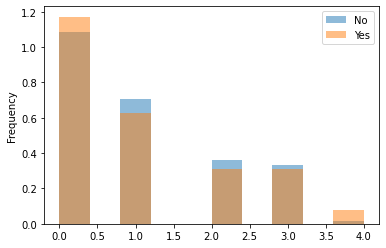

In [ ]:
dataset['what_help_from_others'] = dataset['what_help_from_others'].str.lower()
dataset['total_help'] = dataset['what_help_from_others'].str.split(',').apply(lambda x: len([i for i in x if i != "i don't want help"]))
dataset.groupby('attempt_suicide')['total_help'].plot.hist(legend=True, density=True, alpha = 0.5)

In [ ]:
help_from_others = dataset['what_help_from_others'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
help_from_others = help_from_others.str.strip()

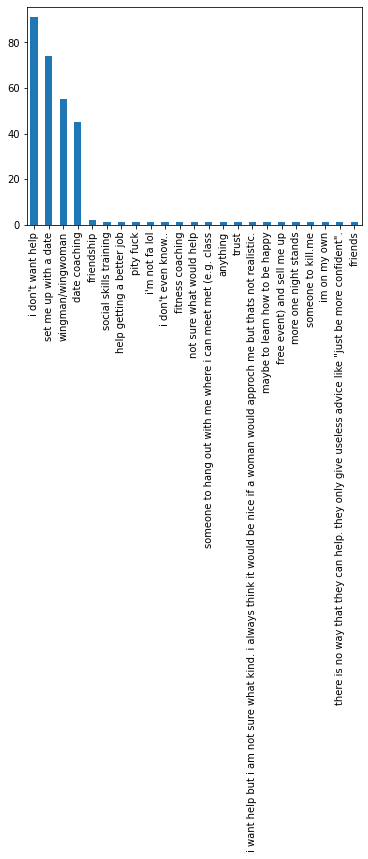

In [ ]:
top_help_from_others = help_from_others.value_counts()
top_help_from_others.plot(kind='bar')

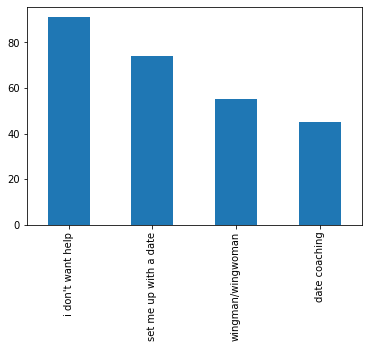

In [ ]:
top_help_from_others = top_help_from_others[top_help_from_others > 5]
top_help_from_others.plot(kind='bar')

In [ ]:
for hlp in top_help_from_others.index:
    dataset['[help] {}'.format(hlp)] = dataset['what_help_from_others'].str.contains(hlp, regex=False)

In [ ]:
col = {x:'sum' for x in dataset.columns if '[help]' in x}
dataset.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching
attempt_suicide,,,,
No,0.340807,0.286996,0.210762,0.161435
Yes,0.357143,0.238095,0.190476,0.214286


In [ ]:
job_dataset = dataset.loc[:,('job_title', 'employment', 'edu_level')].applymap(lambda x: x.strip().lower() if type(x) == str else x)
job_dataset[pd.isna(job_dataset['job_title'])]

,job_title,employment,edu_level
30,NaN,a student,ssc
52,NaN,employed for wages,hsc
54,NaN,a student,"college, no degree"
55,NaN,a student,diploma or the equivalent
119,NaN,self-employed,diploma or the equivalent
126,NaN,looking for work,hsc
128,NaN,retired,hsc
130,NaN,looking for work,ma
166,NaN,looking for work,bsc
170,NaN,out of work but not currently looking for work,hsc


In [ ]:
job_dataset['job_title'].value_counts()

student              42
none                 14
unemployed            8
engineer              6
software engineer     5
                     ..
freshman              1
freelance writer      1
call center agent     1
management            1
financial analyst     1
Name: job_title, Length: 94, dtype: int64

In [ ]:
dataset.shape


(198, 33)

In [ ]:
dataset = dataset.drop(['what_help_from_others', 'improve_yourself_how', 'job_title','date','race', 
                        'bodyweight', 'virgin','pay_for_sex','prostitution_legal'], axis=1)

In [ ]:
dataset.columns

Index(['gender', 'sexuallity', 'age', 'income', 'friends', 'social_fear',
       'depressed', 'attempt_suicide', 'employment', 'edu_level',
       'total_improves', '[improve] none', '[improve] other exercise',
       '[improve] joined a gym', '[improve] therapy', '[improve] meet ups',
       '[improve] join clubs/socual clubs/meet ups',
       '[improve] socual clubs/meet ups',
       '[improve] joined a gym/go to the gym', 'total_help',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching'],
      dtype='object')

In [ ]:
dataset['income'] = '৳' + dataset['income'].astype(str)
new_income = []
for c in dataset['income']:
    print(c.strip('৳').split(' ')[0].replace(',','.'))
    new_income.append(float(c.strip('৳').split(' ')[0].replace(',','.')))

20.000
0
12000
0
15000
18000
5000
0
10.000
35000
25.000
12000
3000
7000
0
3000
22000
0
0
20000
18000
0
8000
0
0
0
12.300
0
20500
1200
0
18000
0
16000
35000
22500
6000
12000
0
24.000
0
9000
24000
0
22.000
5.000
0
5.000
5.000
18000
5000
4500
0
12000
0
0
35000
4000
0
0
18000
0
12000
0
0
12000
0
24.000
0
0
0
8000
14000
12000
180000
20000
0
17000
6000
0
22000
11000
0
0
32000
0
0
0
8000
22000
15000
6000
0
0
6000
22000
18000
0
0
0
0
12000
4000
14000
35000
0
8000
5000
0
9000
5000
0
0
30000
0
0
0
20000
0
8000
0
0
0
0
15000
0
8000
5000
12000
0
0
12000
7000
27000
0
20000
25000
0
35000
0
20000
0
0
8000
0
35000
0
0
0
0
6000
20000
12000
30000
15000
0
0
5000
10000
0
0
0
20000
55000
7000
0
6000
0
0
0
4000
12000
6000
0
0
10000
35000
16000
45000
22000
5000
35000
14000
8000
0
0
5000
0
0
19000
0
12000
10000
0
0
0
10.000
0


In [ ]:
dataset['income_process'] = new_income
dataset = dataset.drop(labels=['income'],axis=1)

In [ ]:
def preprocess(col):
    cols= list(dict(dataset[col].value_counts()).keys())
    vals= []
    for i in range(len(cols)):
        vals.append(i)
    val_dict = dict((key,val) for key,val in zip(cols,vals))
    dataset[col] = dataset[col].map(val_dict)

In [ ]:
for col in dataset.columns:
  preprocess(col)

In [ ]:
dataset.head()

,gender,sexuallity,age,friends,social_fear,depressed,attempt_suicide,employment,edu_level,total_improves,[improve] none,[improve] other exercise,[improve] joined a gym,[improve] therapy,[improve] meet ups,[improve] join clubs/socual clubs/meet ups,[improve] socual clubs/meet ups,[improve] joined a gym/go to the gym,total_help,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching,income_process
0,0,0,13,0,0,0,1,1,7,3,0,1,1,1,1,0,0,0,2,0,1,1,0,38
1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,1,1,1,0
2,0,0,7,3,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,4,8,0,0,0,0,0,2,0,0,1,0,0,0,0,1,1,0,0,0,1,0
4,0,0,0,3,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,9


In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

dataset.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in dataset.columns.values]
X = dataset.drop(labels=['attempt_suicide'],axis=1)
y = dataset['attempt_suicide']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)


In [ ]:
"""from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)
#"X_test_smote,y_test_smote = smote.fit_sample(,y_test)

from collections import Counter
print("Before smote --",Counter(y_train))
print("Before smote --",Counter(y_train_smote))
print(X_train_smote.shape)
#X_test = X_test.astype('float')
#print(np.array(X_train_smote))"""

'from imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state=10)\nX_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)\n#"X_test_smote,y_test_smote = smote.fit_sample(,y_test)\n\nfrom collections import Counter\nprint("Before smote --",Counter(y_train))\nprint("Before smote --",Counter(y_train_smote))\nprint(X_train_smote.shape)\n#X_test = X_test.astype(\'float\')\n#print(np.array(X_train_smote))'

In [ ]:
#import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
X_train_smote,y_train_smote = ros.fit_sample(X_train,y_train)
from collections import Counter
print("Before sampling --",Counter(y_train))
print("after sampling --",Counter(y_train_smote))

Before sampling -- Counter({0: 127, 1: 31})
after sampling -- Counter({0: 127, 1: 127})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from xgboost import  XGBClassifier 
"""84.04model = XGBClassifier(max_depth=15,subsample=0.9,n_estimators=400,
                      learning_rate=0.025,min_child_weight=0.6,random_state = 10)
#model = XGBClassifier(learning_rate=0.01, max_depth= 15, min_child_weight = 0.7, 
                      #n_estimators=100, random_state= 10, subsample = 0.7)"""
"""model = XGBClassifier(max_depth=20,subsample=0.9,n_estimators=400,
                      learning_rate=0.025,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=1, 
                      colsample_bytree = 0.5) 86 balanced"""

model = XGBClassifier(max_depth=12,subsample=0.74,n_estimators=250,
                      learning_rate=0.01,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=0.4, 
                      colsample_bytree = 0.5)
model.fit(X_train_smote,y_train_smote)
#X_test = X_test[X_train_smote.dtype.names]
y_predict = model.predict(X_test.values)
#y_train_predict = model.predict(X_train_smote)
xgbyproba = model.predict_proba(X_test.values)[::,1]

from sklearn.metrics import accuracy_score
print("test - result",accuracy_score(y_test,y_predict))
#print("Train- Result",accuracy_score(y_train,y_train_predict))


test - result 0.95


roc_auc_score 0.20512820512820518


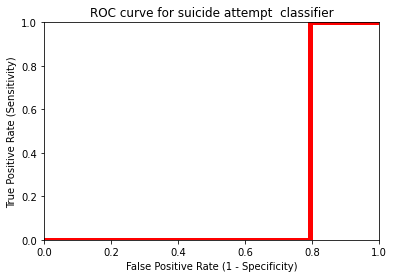

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
xgbt_fpr, xgbt_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test.values)[:,1],drop_intermediate=False)
auc = roc_auc_score(y_test,model.predict_proba(X_test.values)[:,1])
print("roc_auc_score",auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for suicide attempt  classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(xgbt_fpr, xgbt_tpr,color='red',lw=5)
plt.show()

In [ ]:
"""from sklearn.model_selection import GridSearchCV
clf =  XGBClassifier()
parameters = {
    'n_estimators': [100, 250, 500],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0,0.7],
    'learning_rate': [0.01, 0.02,0.05],
    'min_child_weight': [0.7, 0.8,0.6],
    'random_state': [5, 10,105]
}
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train_smote, y_train_smote)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

'from sklearn.model_selection import GridSearchCV\nclf =  XGBClassifier()\nparameters = {\n    \'n_estimators\': [100, 250, 500],\n    \'max_depth\': [6, 9, 12],\n    \'subsample\': [0.9, 1.0,0.7],\n    \'learning_rate\': [0.01, 0.02,0.05],\n    \'min_child_weight\': [0.7, 0.8,0.6],\n    \'random_state\': [5, 10,105]\n}\ngrid = GridSearchCV(clf,\n                    parameters, n_jobs=4,\n                    scoring="neg_log_loss",\n                    cv=3)\n\ngrid.fit(X_train_smote, y_train_smote)\nprint("Best: %f using %s" % (grid.best_score_, grid.best_params_))\n\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nparams = grid.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

[[38  1]
 [ 1  0]]


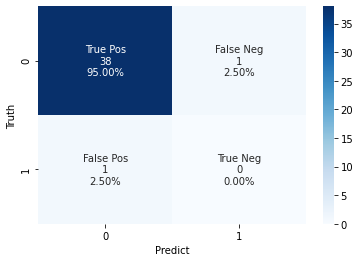

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.00      0.00      0.00         1

    accuracy                           0.95        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test.values, y_predict)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test.values,y_predict))

In [ ]:
"""from sklearn.metrics import roc_curve, auc
#import scikitplot.metrics as skplt
#print(y_pred_svm)
xgbt_fpr, xgbt_tpr, threshold = roc_curve(y_test, y_predict)
#print(svm_fpr)
auc_svm = auc(xg_fpr, xg_tpr)
#skplt.plot_roc (Y_test, preds)
plt.show()
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xg_fpr, xg_tpr, marker='.')
#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()"""

"from sklearn.metrics import roc_curve, auc\n#import scikitplot.metrics as skplt\n#print(y_pred_svm)\nxgbt_fpr, xgbt_tpr, threshold = roc_curve(y_test, y_predict)\n#print(svm_fpr)\nauc_svm = auc(xg_fpr, xg_tpr)\n#skplt.plot_roc (Y_test, preds)\nplt.show()\nplt.figure(figsize=(5, 5), dpi=100)\nplt.plot(xg_fpr, xg_tpr, marker='.')\n#plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)\n\nplt.xlabel('False Positive Rate -->')\nplt.ylabel('True Positive Rate -->')\n\nplt.legend()\n\nplt.show()"

Test Accuracy: 87.50%


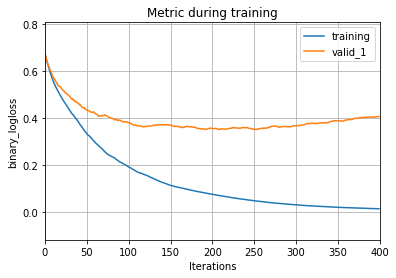

In [ ]:
import lightgbm as lgb
#X_train_smote y_train_smote
eval_set = [(X_train_smote,y_train_smote), (X_test, y_test)]

"""model = lgb.LGBMClassifier(learning_rate=0.025,n_estimators=400,
                           random_state=100,max_depth= 5,max_bin = 200,
                           num_leaves = 25,min_child_weight=0.7)"""

"""model = lgb.LGBMClassifier(learning_rate=0.025,n_estimators= 400,
                          random_state=5,max_depth= 5,max_bin = 200,
                           num_leaves = 10,min_child_weight=0.6)
"bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 6,

"""
"""model = lgb.LGBMClassifier(learning_rate=0.05,n_estimators= 400,
                          random_state=5,max_depth= 5,max_bin = 100,
                           num_leaves = 15,min_child_weight=0.7) 84"""

model = lgb.LGBMClassifier(learning_rate=0.05,n_estimators= 400,
                          random_state=42,max_depth= 10,max_bin = 100,
                           num_leaves = 25,min_child_weight=0.2,
                           feature_fraction = 0.9,) 
model.fit(X_train_smote, y_train_smote,eval_set=eval_set, verbose= False)
lgb.plot_metric(model)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#y_train_predict = model.predict(X_train)
y_preds = model.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#ac = accuracy_score(y_train, y_train_predict)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
#print("Train Accuracy: %.2f%%" % (ac * 100.0))

roc_auc_score 0.15384615384615385


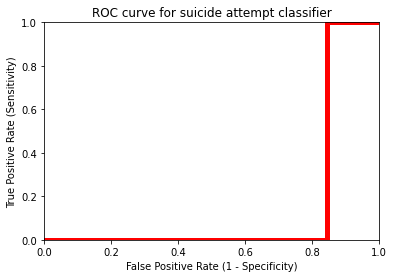

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print("roc_auc_score",auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for suicide attempt classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [ ]:
"""from sklearn.model_selection import GridSearchCV
clf =  lgb.LGBMClassifier()
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 9, 12],
    'max_bin': [200, 50,100],
    'learning_rate': [0.01, 0.025,0.05],
    'min_child_weight': [0.7, 0.8,0.6],
    'random_state': [5, 10,30],
    'num_leaves': [25, 10,30]
}
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

'from sklearn.model_selection import GridSearchCV\nclf =  lgb.LGBMClassifier()\nparameters = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [6, 9, 12],\n    \'max_bin\': [200, 50,100],\n    \'learning_rate\': [0.01, 0.025,0.05],\n    \'min_child_weight\': [0.7, 0.8,0.6],\n    \'random_state\': [5, 10,30],\n    \'num_leaves\': [25, 10,30]\n}\ngrid = GridSearchCV(clf,\n                    parameters, n_jobs=4,\n                    scoring="neg_log_loss",\n                    cv=3)\n\ngrid.fit(X_train, y_train)\nprint("Best: %f using %s" % (grid.best_score_, grid.best_params_))\n\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nparams = grid.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

[[35  4]
 [ 1  0]]


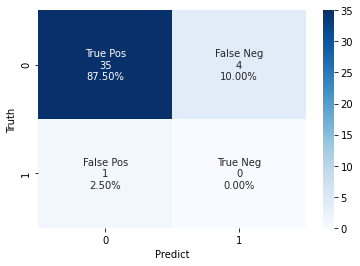

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        39
           1       0.00      0.00      0.00         1

    accuracy                           0.88        40
   macro avg       0.49      0.45      0.47        40
weighted avg       0.95      0.88      0.91        40



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test,predictions))

In [ ]:
from sklearn import svm
#X_train_smote y_train_smote
from sklearn.metrics import plot_confusion_matrix
"""svc = svm.SVC(C=300, kernel="rbf", probability=True,
              random_state=100,gamma=0.5, tol=0.6,max_iter= 1000)"""

svc = svm.SVC(C=3, kernel="rbf",
              random_state=5,gamma=0.08, tol=0.06,max_iter= 400,probability=True)

clf=svc.fit(X_train_smote, y_train_smote)
#y_pred_svm = svc.predict(X_test)


y_pred_svm  = svc.predict(X_test)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
pd.crosstab(y_test,y_pred_svm)
Xg = svc.predict_proba(X_test)[0]
thr3=np.where(svc.predict_proba(X_test)[:,1]>0.7,1,0)
pd.crosstab(y_test,y_pred_svm)


Accuracy: 92.50%


col_0,0,1
attempt_suicide,,
0,37,2
1,1,0


roc_auc_score 0.15384615384615385


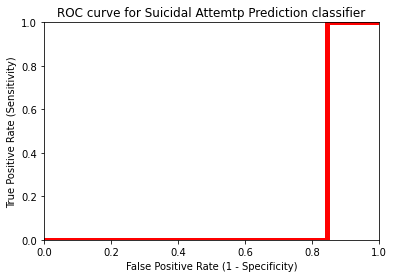

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fprv, tprv, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1],drop_intermediate=False)
aucv = roc_auc_score(y_test,svc.predict_proba(X_test)[:,1])
print("roc_auc_score",aucv)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Suicidal Attemtp Prediction classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

[[37  2]
 [ 1  0]]


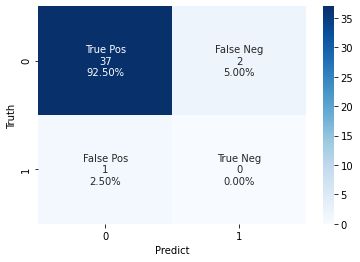

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.00      0.00      0.00         1

    accuracy                           0.93        40
   macro avg       0.49      0.47      0.48        40
weighted avg       0.95      0.93      0.94        40



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test, y_pred_svm)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test,y_pred_svm))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#X_train_smote y_train_smote
"""model = RandomForestClassifier(n_estimators = 100,max_depth=7
                               ,random_state=5)"""

"""model = RandomForestClassifier(n_estimators = 100,max_depth=6
                               ,random_state=30)"""

"""model = RandomForestClassifier(n_estimators = 300,max_depth=7
                               ,random_state=10,verbose=0)for imbalance"""
model = RandomForestClassifier(n_estimators = 400,max_depth=20
                               ,random_state=5)

model.fit(X_train_smote,y_train_smote)
pre = model.predict(X_test)
from sklearn import metrics
predictions = [round(value) for value in pre]
accuracy = accuracy_score(y_test, predictions)
y_preds = model.predict_proba(X_test)[:,1]

# take the second column because the classifier outputs scores for
# the 0 class as well
#preds = y_preds[:,1]
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.00%


In [ ]:
"""from sklearn.model_selection import GridSearchCV
clf =  RandomForestClassifier()
parameters = {
    'n_estimators': [100, 200, 400],
    'max_depth': [7, 14, 21],
    'random_state': [5, 10,25]
}
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

'from sklearn.model_selection import GridSearchCV\nclf =  RandomForestClassifier()\nparameters = {\n    \'n_estimators\': [100, 200, 400],\n    \'max_depth\': [7, 14, 21],\n    \'random_state\': [5, 10,25]\n}\ngrid = GridSearchCV(clf,\n                    parameters, n_jobs=4,\n                    scoring="neg_log_loss",\n                    cv=3)\n\ngrid.fit(X_train, y_train)\nprint("Best: %f using %s" % (grid.best_score_, grid.best_params_))\n\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nparams = grid.cv_results_[\'params\']\n\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

[[38  1]
 [ 1  0]]


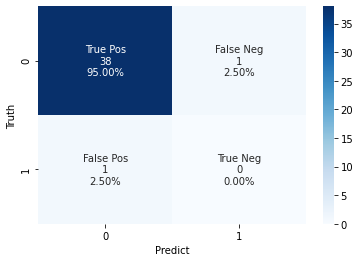

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.00      0.00      0.00         1

    accuracy                           0.95        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(y_test, pre)
print(cf_matrix)
group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
#labels = ["True Neg","False Pos","False Neg","True Pos"]

plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()
print(classification_report(y_test,pre))

roc_auc_score 0.28205128205128205


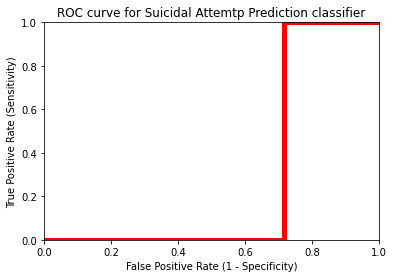

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print("roc_auc_score",auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Suicidal Attemtp Prediction classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

0.15384615384615385
xxxx
xxxx
xxxx
xxxx


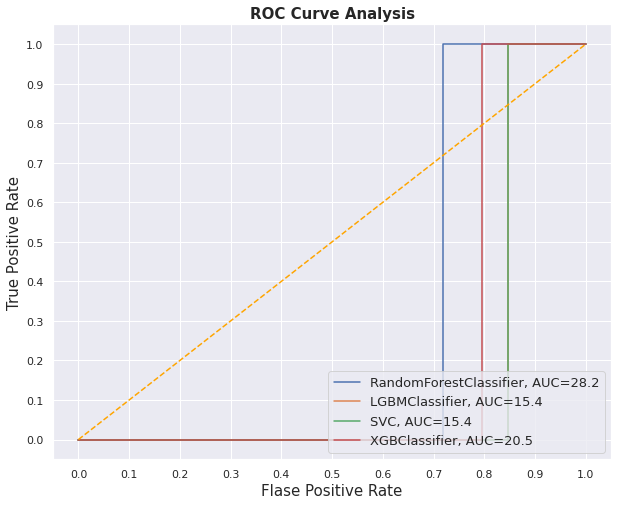

In [ ]:
# Instantiate the classfiers and make a list
"""xgbmodel =  XGBClassifier(max_depth=12,subsample=0.7,n_estimators=250,
                      learning_rate=0.01,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=0.4, 
                      colsample_bytree = 0.5)"""
from sklearn import svm
rfmodel = RandomForestClassifier(n_estimators = 400,max_depth=20
                               ,random_state=5)

lgbmodel =  lgb.LGBMClassifier(learning_rate=0.05,n_estimators= 400,
                          random_state=42,max_depth= 10,max_bin = 100,
                           num_leaves = 25,min_child_weight=0.2,
                           feature_fraction = 0.9,) 

classifiers = [rfmodel,lgbmodel]
"""classifiers = [xgb.XGBClassifier(), 
               RandomForestClassifier(n_estimators = 20), 
               svm.SVC(), 
               lgb.LGBMClassifier()]"""

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    #print("fdsfdf")
    model = cls.fit(X_train_smote, y_train_smote)
    yproba = model.predict_proba(X_test)[::,1]
    
    #fpr, tpr, _ = roc_curve(y_test,  yproba)
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


# Set name of the classifiers as index labels
svm = svm.SVC(C=10, kernel="rbf",
              random_state=42,gamma=0.1, tol=0.01,max_iter= 100000,probability=True)
print(aucv)
result_table = result_table.append({'classifiers':svm.__class__.__name__,
                                        'fpr':fprv, 
                                        'tpr':tprv, 
                                        'auc':aucv}, ignore_index=True)

#xgb
xgbmodel =  XGBClassifier(max_depth=12,subsample=0.7,n_estimators=250,
                      learning_rate=0.01,min_child_weight=0.6,
                      random_state = 10,scale_pos_weight=0.4, 
                      colsample_bytree = 0.5)
aucxgb = roc_auc_score(y_test, xgbyproba)
result_table = result_table.append({'classifiers':xgbmodel.__class__.__name__,
                                        'fpr':xgbt_fpr, 
                                        'tpr':xgbt_tpr, 
                                        'auc':aucxgb}, ignore_index=True)
result_table.set_index('classifiers', inplace=True)

#print(result_table.count)
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    print("xxxx")
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.1f}".format(i, result_table.loc[i]['auc']*100))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
